In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
import warnings
from sklearn.metrics import classification_report
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Cleaning

In [2]:
df_bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We validate that in “Experience” there are values less than 0, with -3 being the minimum Experience value. Let’s see what type of clients these values correspond to:

In [6]:
df_bank[df_bank['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [7]:
df_bank[df_bank['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

We can assume that they are young clients with no work experience, so we are going to replace their negative values with 0.

In [8]:
df_bank['Experience'] = df_bank['Experience'].apply(lambda x: x if x > 0 else 0)


In [9]:
df_bank.duplicated().sum()

0

Is there a linear/mathematical relationship between the values in the Education column, i.e., Undergrad is twice Graduate and Professional are 50% more than Graduate? We consider that not, so we are going to transform them into dummy variables.

In [10]:
education_dicc = {1: 'Undergrad', 2: 'Graduate', 3:'Professional'}

df_bank['Education'] = df_bank['Education'].map(education_dicc).astype('str')
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [11]:
df_bank = pd.get_dummies(df_bank, columns=['Education'], drop_first=True)

In [12]:
df_bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_Professional',
       'Education_Undergrad'],
      dtype='object')

In [13]:
df = df_bank.drop(['ID', 'ZIP Code'], axis=1)

In [14]:
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Professional,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,0


The solution that the proposed model offers is to optimize marketing campaigns to focus efforts and resources on the customers who are the most likely to accept the loan. We can think of the company in the current context, where it is necessary to carry out the greatest possible reduction in expenses to maximize profitability. Taking this into account, before the model reaches production, it will be evaluated which of the models is the most consistent with the proposed objective. A false negative is more expensive since the opportunity cost of a person who probably would have accepted the loan if the campaign came through is being lost.



## EDA

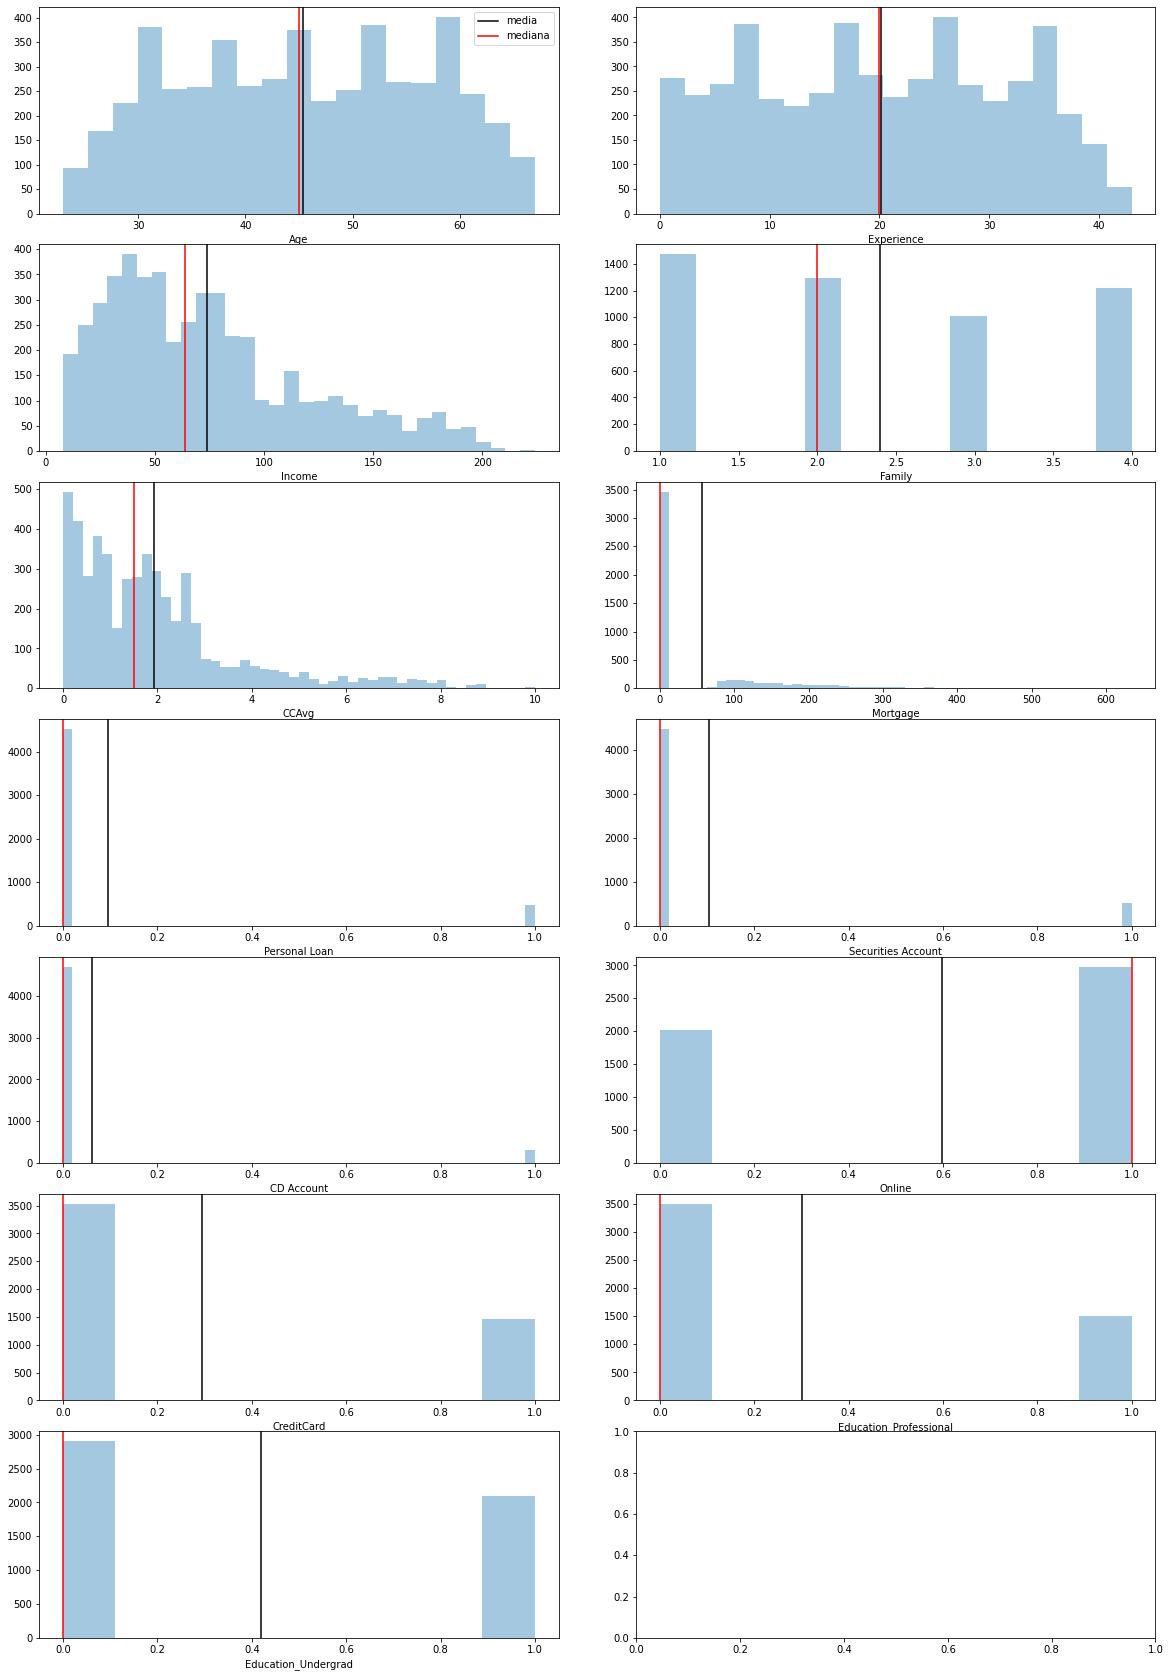

In [15]:
f,ax = plt.subplots(7,2,figsize=(20,30),gridspec_kw={'wspace':0.15,'hspace':0.15})

ax = ax.ravel()
for i,col in enumerate(x for x in df.columns):
    sns.distplot(df[col],ax=ax[i],kde=False)
    ax[i].axvline(x=df[col].mean(),color='k',label='media')
    ax[i].axvline(x=df[col].median(),color='r',label='mediana')    
ax[0].legend();

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Professional,Education_Undergrad
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.045838,-0.027770
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910,0.021303,-0.003249
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.108878,0.218019
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.008744,-0.118628
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.080413,0.156979
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.014942,0.042841
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.090212,-0.148894
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.012421,0.006863
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.009780,-0.014630
Online,0.013702,0.013975,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,-0.023837,0.003394


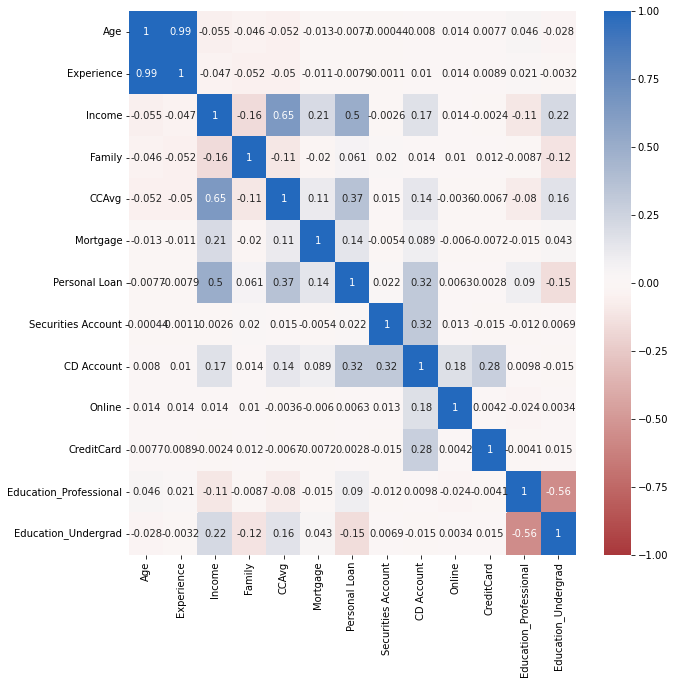

In [16]:
mat_corr = df.corr()
display(mat_corr)

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(mat_corr,annot=True,ax=ax,cmap="vlag_r",center=0,vmin=-1,vmax=1);

- Age and Experience are correlated: we keep only one of them, to avoid multicollinearity.

In [17]:
df['CreditCard'].value_counts(normalize=True)


0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [18]:
df['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [19]:
df['Securities Account'].value_counts(normalize=True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [20]:
df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

- The unbalanced variables are: CreditCard, CD Account, Securities Account, Personal Loan (target variable)

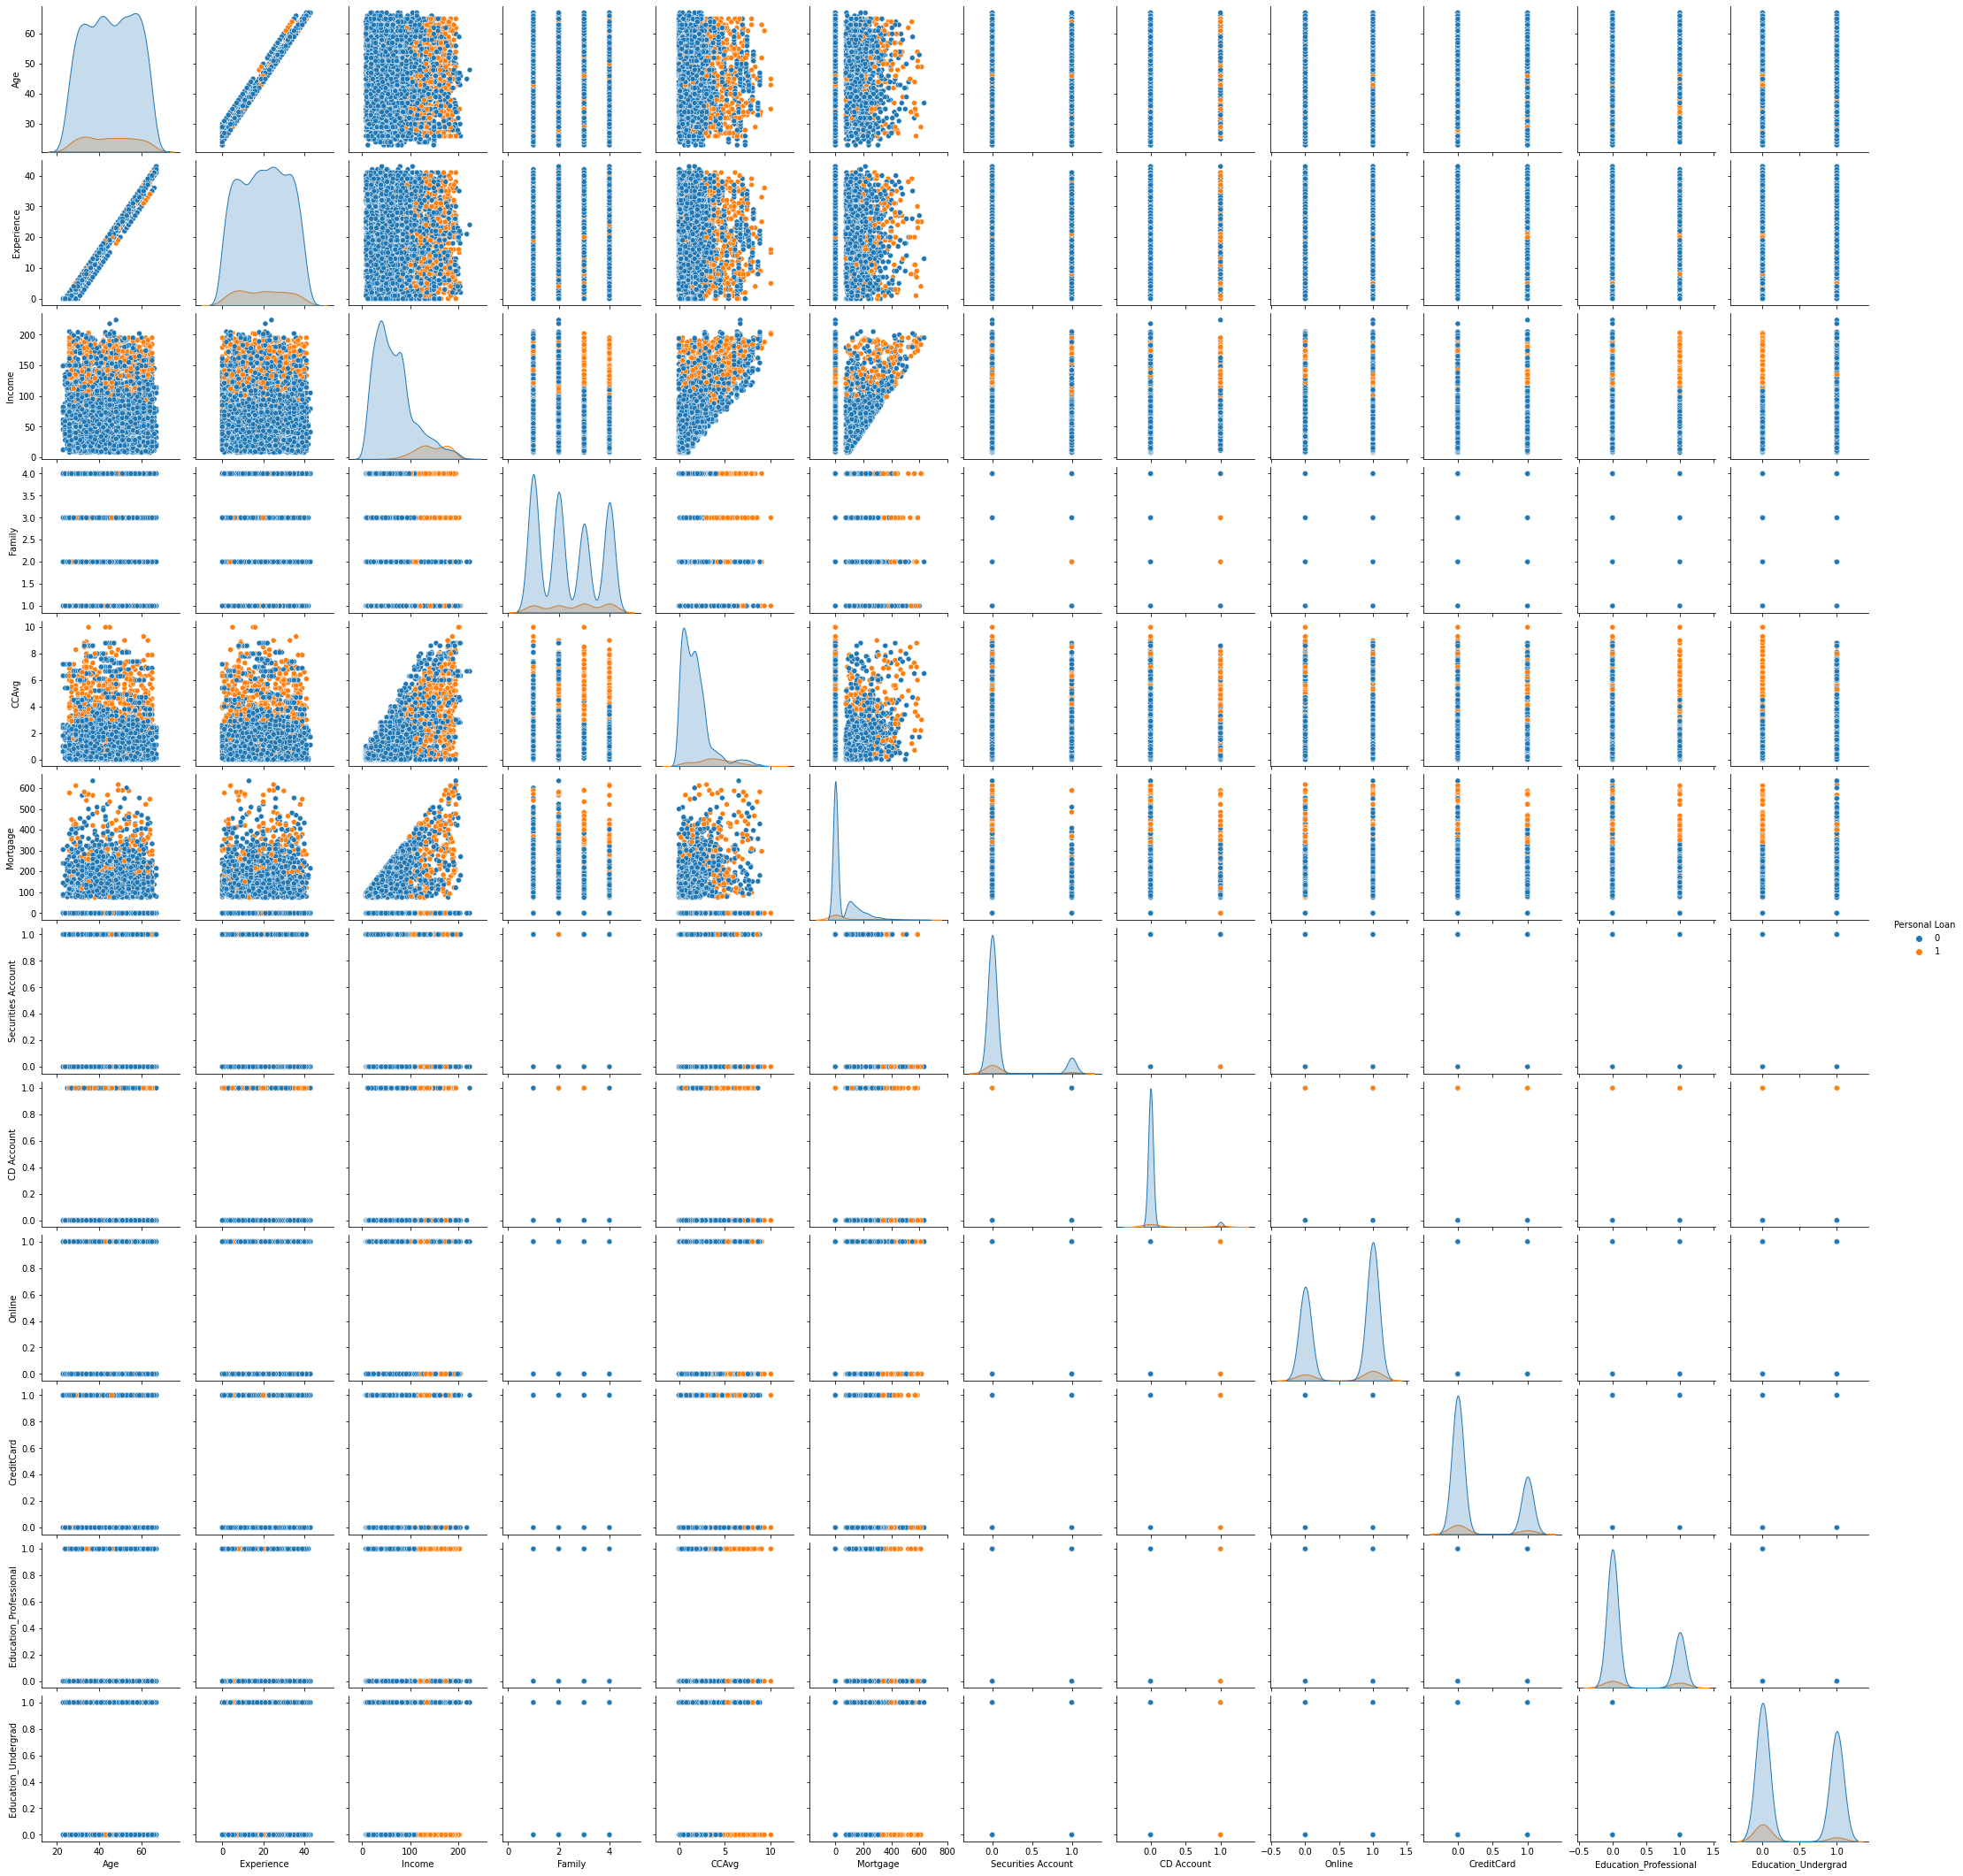

In [21]:
sns.pairplot(data=df, hue='Personal Loan');

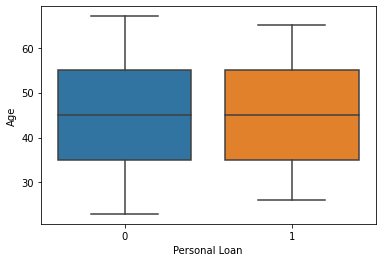

In [22]:
sns.boxplot(x = df['Personal Loan'], y = df['Age']);

It seems that the mean value of both groups is relatively similar.

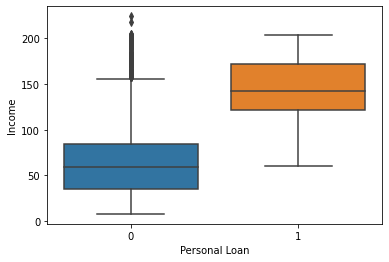

In [23]:
sns.boxplot(x = df['Personal Loan'], y = df['Income']);

The average income of the people who took the loan is higher than that of the people who did not take the loan.

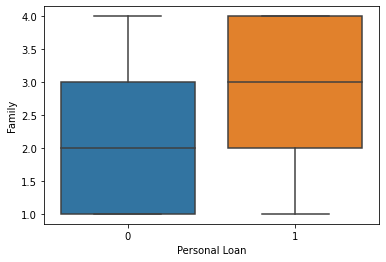

In [24]:
sns.boxplot(x = df['Personal Loan'], y = df['Family']);

Loan takers appear to have a larger family than non-loan takers, on average.

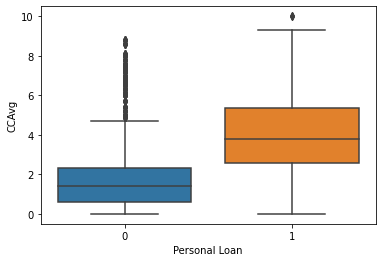

In [25]:
sns.boxplot(x = df['Personal Loan'], y = df['CCAvg']);

People who take the loan have a higher card expense compared to people who did not take the loan, on average.

## Train Test split

In [26]:
X = df.drop(['Personal Loan', 'Experience'], axis=1)
y = df['Personal Loan']

In [27]:
X = df[['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'CD Account', 'Education_Undergrad']]
y = df['Personal Loan']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123)

In [29]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3750, 7)
y_train.shape:  (3750,)
X_test.shape:  (1250, 7)
y_test.shape:  (1250,)


In [30]:
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Values standardization

In [32]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns= X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns= X_test.columns)

## Logistic Regression

In [33]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [34]:
print('Accuracy on the training set = {:.4f}'.format(accuracy_score(y_train, y_pred_train)))

print('Accuracy on the test set = {:.4f}'.format(accuracy_score(y_test, y_pred_test)))

Accuracy on the training set = 0.9563
Accuracy on the test set = 0.9544


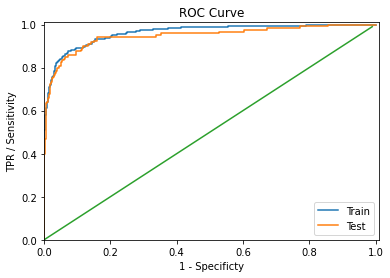

In [35]:
y_proba_train = log_reg.predict_proba(X_train)
y_proba_test = log_reg.predict_proba(X_test) 


fpr_train, tpr_train, thr_train = roc_curve(y_train, y_proba_train[:,1])
fpr_test,tpr_test,thr_test = roc_curve(y_test, y_proba_test[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Train','Test'])
plt.show() 

In [36]:
print('AUC Train=', auc(fpr_train,tpr_train))
print('AUC Test=', auc(fpr_test,tpr_test))

AUC Train= 0.9617445099967223
AUC Test= 0.9468731563421828


Classification report

In [37]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1130
           1       0.83      0.66      0.73       120

    accuracy                           0.95      1250
   macro avg       0.90      0.82      0.85      1250
weighted avg       0.95      0.95      0.95      1250



In [38]:
report = classification_report(y_test, y_pred_test, output_dict=True)
print(report)

{'0': {'precision': 0.9645021645021645, 'recall': 0.9858407079646018, 'f1-score': 0.975054704595186, 'support': 1130}, '1': {'precision': 0.8315789473684211, 'recall': 0.6583333333333333, 'f1-score': 0.7348837209302326, 'support': 120}, 'accuracy': 0.9544, 'macro avg': {'precision': 0.8980405559352929, 'recall': 0.8220870206489675, 'f1-score': 0.8549692127627093, 'support': 1250}, 'weighted avg': {'precision': 0.9517415356573252, 'recall': 0.9544, 'f1-score': 0.9519982901633505, 'support': 1250}}


In [39]:
df_classification_report = pd.DataFrame(report).transpose()
log_reg_f1 = df_classification_report['f1-score']['macro avg']
df_classification_report.head()

,precision,recall,f1-score,support
0,0.964502,0.985841,0.975055,1130.0000
1,0.831579,0.658333,0.734884,120.0000
accuracy,0.954400,0.954400,0.954400,0.9544
macro avg,0.898041,0.822087,0.854969,1250.0000
weighted avg,0.951742,0.954400,0.951998,1250.0000


## Decision Tree

In [40]:
tree = DecisionTreeClassifier(random_state=123)

tree.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.984


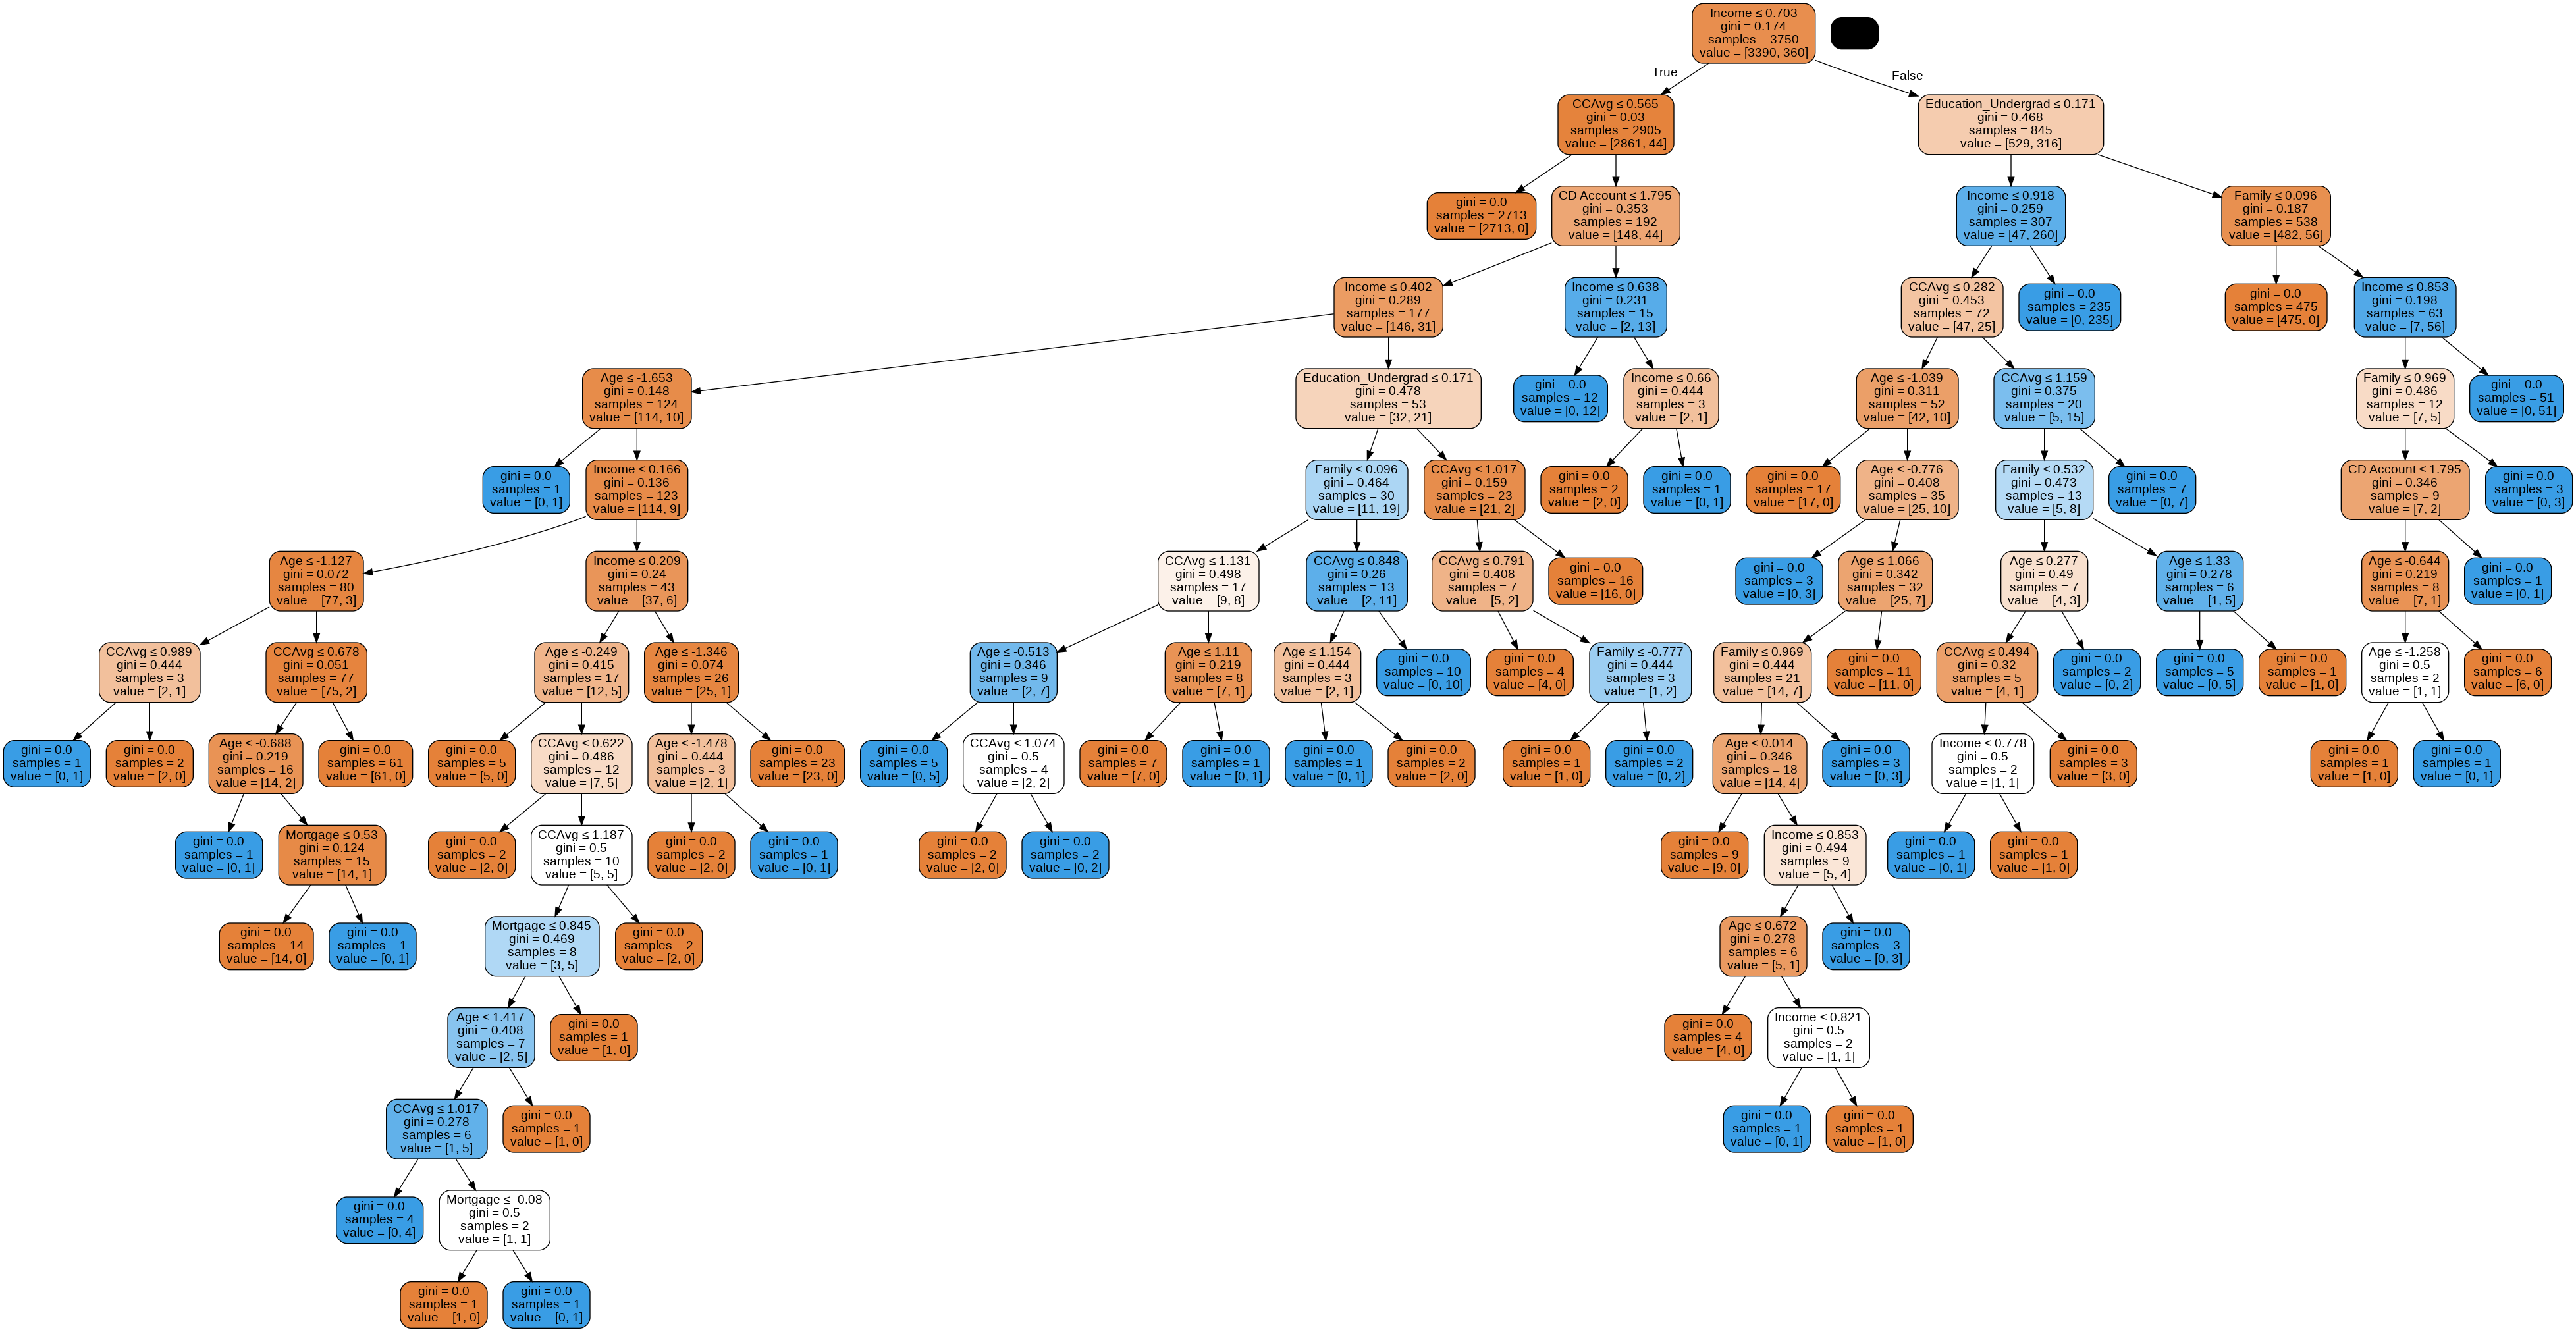

In [41]:
dot_data=export_graphviz(tree, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

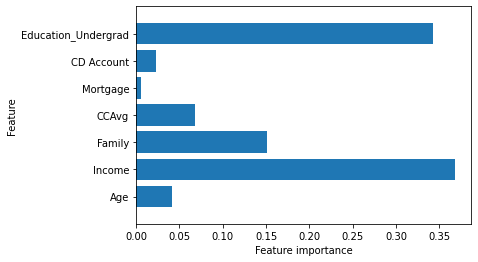

In [42]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

In [43]:
#Get the best hyperparameters by using RandomizedSearchCV

param_grid = {'max_depth':st.randint(1,10),
              'max_features':st.randint(0,14), 
              'max_leaf_nodes':st.randint(5,50),
              'min_samples_leaf':st.randint(1,10),
              'min_samples_split':st.randint(5,15),
              'criterion':['gini', 'entropy'],
              'class_weight':['balanced', None],
              'ccp_alpha':st.uniform(0, 0.00005)}
skf = StratifiedKFold(n_splits=3)

tree_rs = DecisionTreeClassifier(random_state=1)
rs = RandomizedSearchCV(tree_rs, param_grid, n_iter=100, cv=skf, verbose=1 , n_jobs=-1, random_state=1)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4278922df0>,
                                        'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_i...
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4278536fd0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4278536c70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4278536400>,
                                        'min_samples_split': 

In [44]:
rs.best_estimator_.get_params()

{'ccp_alpha': 1.2017781242456944e-05,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 6,
 'max_leaf_nodes': 28,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

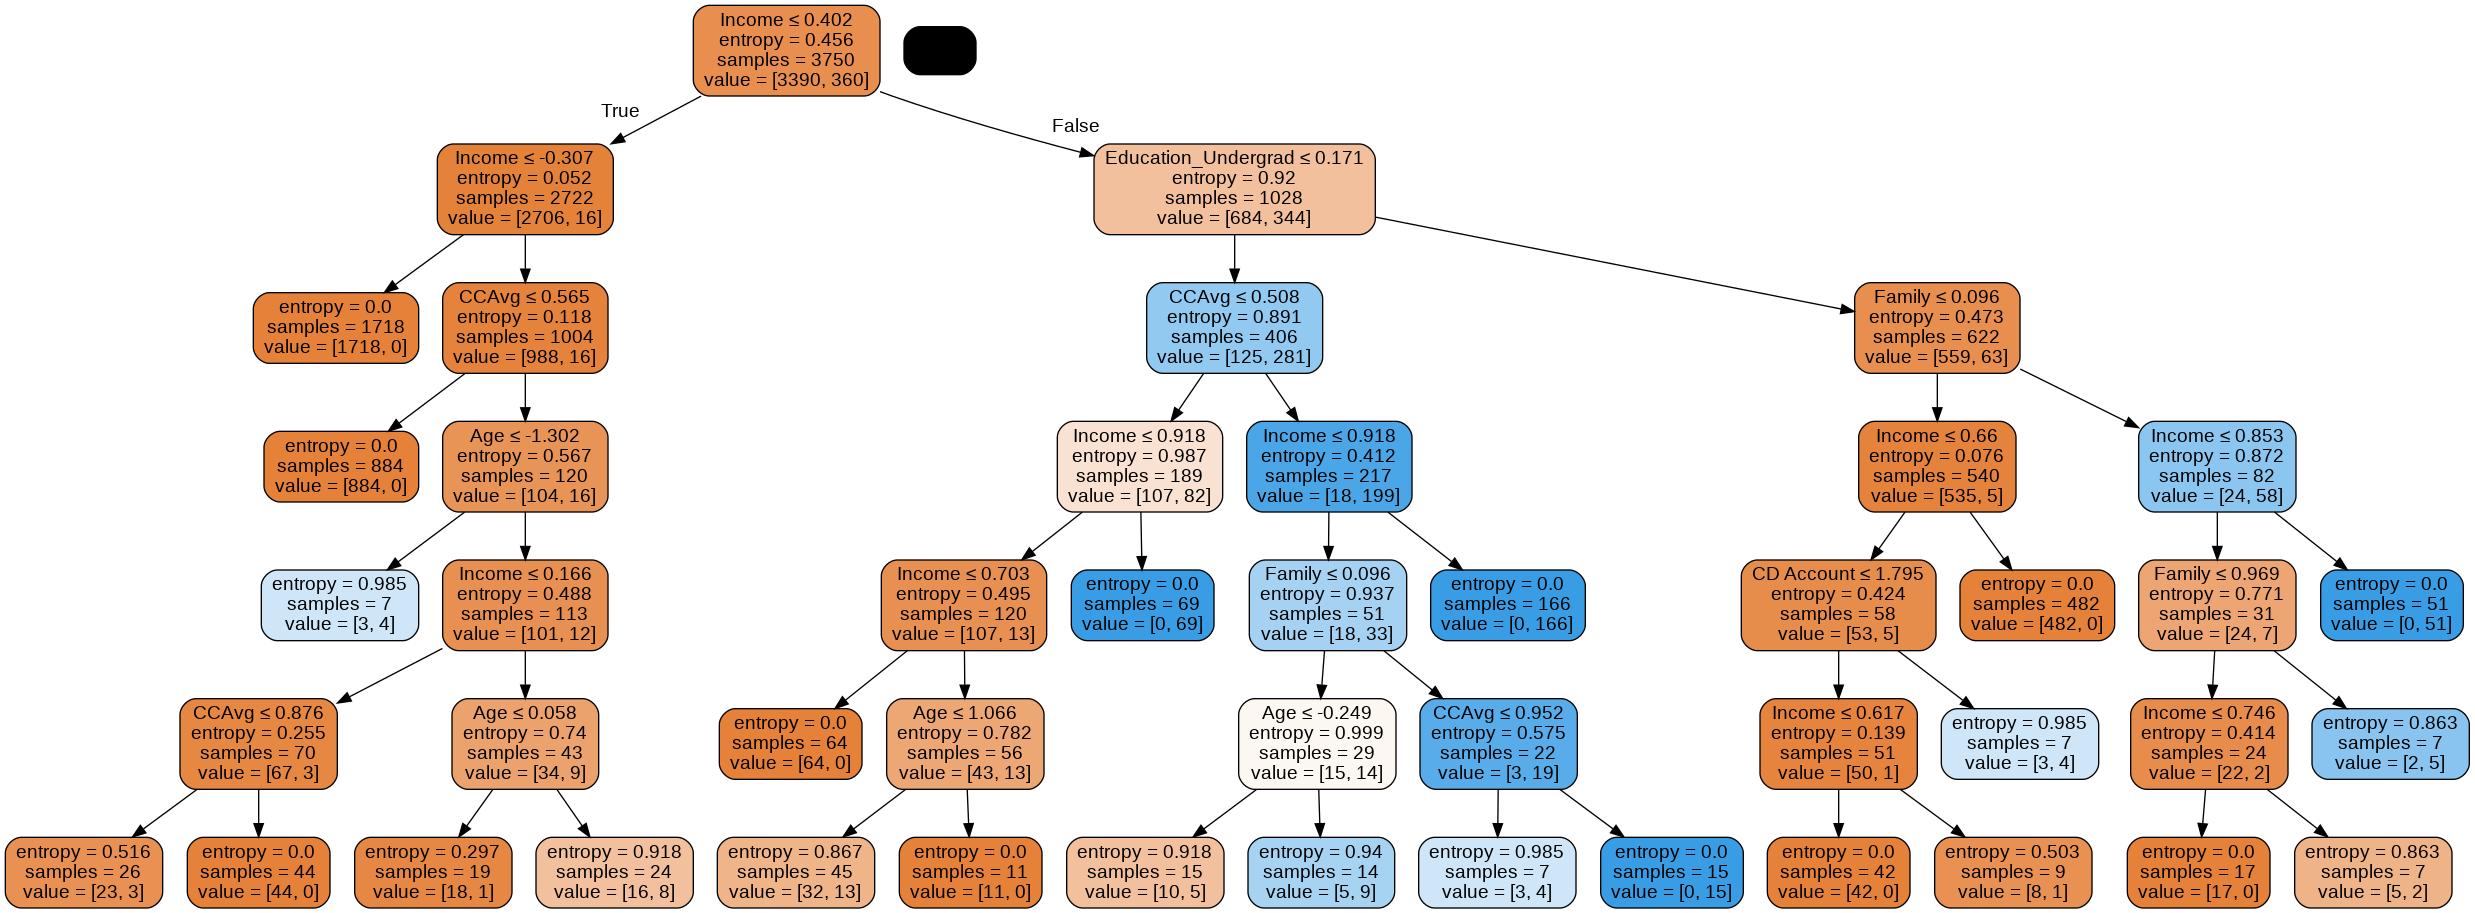

In [45]:
dot_data=export_graphviz(rs.best_estimator_, out_file=None,  
                feature_names=X_train.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

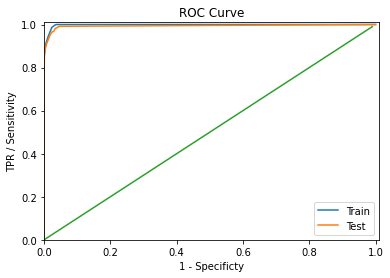

In [46]:
y_proba_train = rs.best_estimator_.predict_proba(X_train)
y_proba_test = rs.best_estimator_.predict_proba(X_test) 


fpr_train, tpr_train, thr_train = roc_curve(y_train, y_proba_train[:,1])
fpr_test,tpr_test,thr_test = roc_curve(y_test, y_proba_test[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Train','Test'])
plt.show() 

In [47]:
print("Accuracy on training set: {:.3f}".format(rs.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rs.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.985


In [48]:
print('AUC Train=', auc(fpr_train,tpr_train))
print('AUC Test=', auc(fpr_test,tpr_test))

AUC Train= 0.9983906915765323
AUC Test= 0.9937094395280236


In [49]:
y_pred_test = rs.best_estimator_.predict(X_test)
report = classification_report(y_test, y_pred_test, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
dec_tree_f1 = df_classification_report['f1-score']['macro avg']
df_classification_report.head()

,precision,recall,f1-score,support
0,0.990291,0.992920,0.991604,1130.0000
1,0.931624,0.908333,0.919831,120.0000
accuracy,0.984800,0.984800,0.984800,0.9848
macro avg,0.960958,0.950627,0.955718,1250.0000
weighted avg,0.984659,0.984800,0.984714,1250.0000


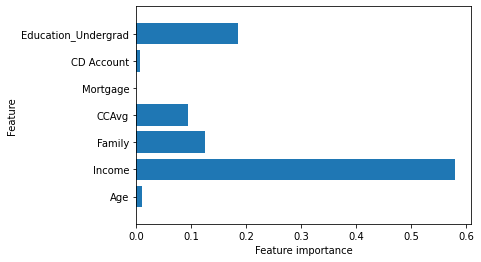

In [50]:
plot_feature_importances(rs.best_estimator_)

## Bagging - Random Forest

In [51]:
model_rf = RandomForestClassifier(random_state=123)

In [52]:
#Get the best hyperparameters by using RandomizedSearchCV

params = {  
    "n_estimators": st.randint(10,100),
    "max_depth": st.randint(1, 10),  
    "class_weight": [None, "balanced"]
}

rf = RandomizedSearchCV(model_rf, params, n_iter=40, cv=skf, verbose= True, n_jobs=-1,\
                        random_state=14)
rf.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=123),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f427b4ba1c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f427846d970>},
                   random_state=14, verbose=True)

In [53]:
rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 42,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [54]:
y_predicted_rf = rf.predict_proba(X_test)

rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("AUC = : ", rf_auc)

AUC = :  0.9957227138643068


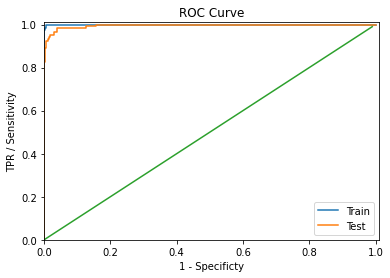

In [55]:
y_proba_train = rf.best_estimator_.predict_proba(X_train)
y_proba_test = rf.best_estimator_.predict_proba(X_test) 


fpr_train, tpr_train, thr_train = roc_curve(y_train, y_proba_train[:,1])
fpr_test,tpr_test,thr_test = roc_curve(y_test, y_proba_test[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Train','Test'])
plt.show()

In [56]:
print("Accuracy on training set: {:.3f}".format(rf.best_estimator_.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.best_estimator_.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.986


In [57]:
y_pred_test = rf.best_estimator_.predict(X_test)
report = classification_report(y_test, y_pred_test, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
rf_f1 = df_classification_report['f1-score']['macro avg']
df_classification_report.head()

,precision,recall,f1-score,support
0,0.988576,0.995575,0.992063,1130.0000
1,0.955357,0.891667,0.922414,120.0000
accuracy,0.985600,0.985600,0.985600,0.9856
macro avg,0.971967,0.943621,0.957239,1250.0000
weighted avg,0.985387,0.985600,0.985377,1250.0000


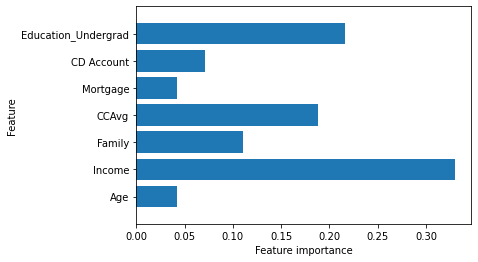

In [58]:
plot_feature_importances(rf.best_estimator_)

## Boosting - XGBoost

In [59]:
model_xgb = xgb.XGBClassifier(n_jobs=-1)

In [60]:
#Get the best hyperparameters by using RandomizedSearchCV

params_xgb = {  
    "n_estimators": st.randint(10,40), 
    "max_depth": st.randint(1, 10),   
    "learning_rate": st.uniform(0.05, 0.5)
}
xgb_cv = RandomizedSearchCV(model_xgb, params_xgb, n_iter=30, cv=skf, verbose=True, n_jobs=-1, random_state=123)

In [61]:
xgb_cv.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=XGBClassifier(n_jobs=-1), n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42782a08e0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4278d9aee0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4278d800d0>},
                   random_state=123, verbose=True)

In [62]:
xgb_cv.best_params_

{'learning_rate': 0.5439976432583337, 'max_depth': 4, 'n_estimators': 20}

In [63]:
y_predicted_xgb = xgb_cv.predict_proba(X_test)
xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print("AUC =  ", xgb_auc)

AUC =   0.9972492625368732


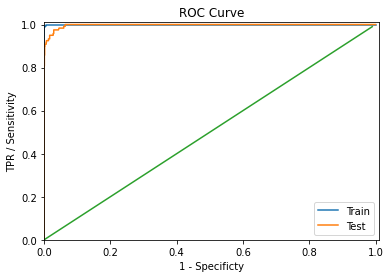

In [64]:
y_proba_train = xgb_cv.predict_proba(X_train)
y_proba_test = xgb_cv.predict_proba(X_test) 


fpr_train, tpr_train, thr_train = roc_curve(y_train, y_proba_train[:,1])
fpr_test,tpr_test,thr_test = roc_curve(y_test, y_proba_test[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_train,tpr_train)
plt.plot(fpr_test,tpr_test)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Train','Test'])
plt.show()

In [65]:
print("Accuracy on training set: {:.3f}".format(xgb_cv.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb_cv.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.986


In [66]:
y_pred_test = xgb_cv.predict(X_test)
report = classification_report(y_test, y_pred_test, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
xgb_f1 = df_classification_report['f1-score']['macro avg']
df_classification_report.head()

,precision,recall,f1-score,support
0,0.990300,0.993805,0.992049,1130.0000
1,0.939655,0.908333,0.923729,120.0000
accuracy,0.985600,0.985600,0.985600,0.9856
macro avg,0.964977,0.951069,0.957889,1250.0000
weighted avg,0.985438,0.985600,0.985491,1250.0000


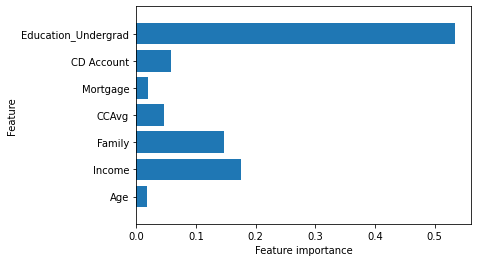

In [67]:
plot_feature_importances(xgb_cv.best_estimator_)

## Deep Learning - MLP

In [68]:
X_train.shape

(3750, 7)

In [69]:
model = keras.Sequential(name='mlp_model')
model.add(keras.Input(shape=(7,)))
model.add(layers.Dense(128, activation="relu", name="layer1"))
model.add(layers.Dense(128, activation="relu", name="layer2"))
model.add(layers.Dense(1, activation="sigmoid", name="output"))


In [70]:
model.summary()

Model: "mlp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               1024      
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


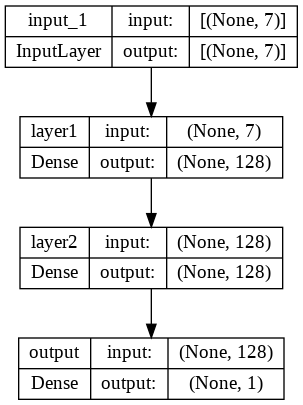

In [71]:
plot_model(model, show_shapes=True)

In [72]:
model.compile(loss='binary_crossentropy',
                metrics=['accuracy'],
                optimizer='rmsprop')

In [73]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, restore_best_weights=True, verbose=1)
callbacks = [early_stopping]
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
callbacks.append(reduce_lr)

In [74]:
model.fit(X_train, y_train,
            epochs=20,
            batch_size=24,
            validation_split=0.1)

Epoch 1/20
141/141 [==============================] - 2s 6ms/step - loss: 0.1532 - accuracy: 0.9479 - val_loss: 0.0865 - val_accuracy: 0.9627
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9698 - val_loss: 0.0626 - val_accuracy: 0.9733
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9754 - val_loss: 0.0609 - val_accuracy: 0.9707
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9781 - val_loss: 0.0652 - val_accuracy: 0.9760
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9796 - val_loss: 0.0539 - val_accuracy: 0.9760
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9804 - val_loss: 0.0604 - val_accuracy: 0.9733
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9796 - val_loss: 0.0577 - val_accuracy: 0.9787
Epoch 

In [75]:
test_loss, test_acc = model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9792


In [76]:
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.where(y_test_pred_prob > 0.5,1,0).reshape(-1,)
y_test_pred

40/40 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [77]:
report = classification_report(y_test,y_test_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
mlp_f1 = df_classification_report['f1-score']['macro avg']
df_classification_report.head()

,precision,recall,f1-score,support
0,0.988496,0.988496,0.988496,1130.0000
1,0.891667,0.891667,0.891667,120.0000
accuracy,0.979200,0.979200,0.979200,0.9792
macro avg,0.940081,0.940081,0.940081,1250.0000
weighted avg,0.979200,0.979200,0.979200,1250.0000


In [78]:
f1_models = pd.DataFrame({
                        'model': ['Log Reg', 'Decision Tree', 'Random Forest', 'MLP','XGBoost'],
                        'f1-score': [log_reg_f1, dec_tree_f1, rf_f1, mlp_f1, xgb_f1]
                     })
f1_models = f1_models.sort_values(by=['f1-score'], ascending=False)
f1_models.reset_index(drop=True, inplace=True)
f1_models

,model,f1-score
0,XGBoost,0.957889
1,Random Forest,0.957239
2,Decision Tree,0.955718
3,MLP,0.940081
4,Log Reg,0.854969


<BarContainer object of 5 artists>

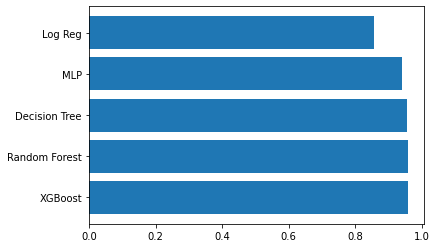

In [79]:
plt.barh(y=f1_models['model'], width = f1_models['f1-score'])

## Conclusions

Analyzing the structure of the dataset that was used for the training, I noticed a disparity in the objective variable distribution (“No” in 90% and “Yes” in the remaining 10%).
Taking this into account, I change the accuracy metric to measure the model’s performance by the F1-score, since it allows harmonizing the disparity of the objective variable.
After my analysis, I could observe that the most classic ML model, such as logistic regression, does not perform as well as the rest. In fourth place is the MLP model (an input layer, two hidden layers with 128 neurons each, and a dense output layer to make the prediction), which presents a considerable difference from the logistic regression model. Yet still, it is a little below the rest of the models. Analyzing the 3 most optimal models, I do not show a marked difference in performance. The model selection will not vary by performance, so will be determined by an economic factor and the availability of the resources (implementation cost, training, processing, etc.) to make the decision.